In [1]:
import brainbox as bb
import alf.io as aio
import numpy as np
import matplotlib.pyplot as plt
import ibllib.ephys.spikes as e_spks # (*Note, if there is no ‘alf’ directory, make ‘alf’ directory from ‘ks2’ output directory):

ModuleNotFoundError: No module named 'alf'

In [ ]:
e_spks.ks2_to_alf(path_to_ks_out, path_to_alf_out) # Load the alf spikes bunch and clusters bunch, and get a units bunch. 
spks_b = aio.load_object(path_to_alf_out, ‘spikes’)
clstrs_b = aio.load_object(path_to_alf_out, ‘clusters’)
units_b = bb.processing.get_units_bunch(spks_b) # may take a few mins to compute

## navie bayes

In [1]:
# load mat
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
# reading
mat_contents = sio.loadmat('mat/tmp.mat')

X = mat_contents['X']
Y = mat_contents['Y'].squeeze()

In [3]:
from sklearn.linear_model import LogisticRegression

In [7]:
clf = LogisticRegression(penalty='l2',C=0.5,max_iter=1e4).fit(X,Y)

In [17]:
np.logspace(-4, 4, 10)

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [18]:
clf = LogisticRegression().fit(X,Y)

ValueError: Penalty term must be positive; got (C=array([1.00000000e-03, 5.99484250e-03, 3.59381366e-02, 2.15443469e-01,
       1.29154967e+00, 7.74263683e+00, 4.64158883e+01, 2.78255940e+02,
       1.66810054e+03, 1.00000000e+04]))

In [6]:
clf.intercept_

array([  6.40752063, -10.92660644,   4.51908582])

In [29]:
sio.savemat('mat/pythonsave.mat',{'coef': clf.coef_.T, 'intercept': clf.intercept_})

In [7]:
clf.classes_

array([1, 2, 3], dtype=uint8)

In [9]:
clf.coef_.shape

(3, 78)

In [10]:
clf.intercept_.shape

(3,)

In [14]:
clf.C

1.0

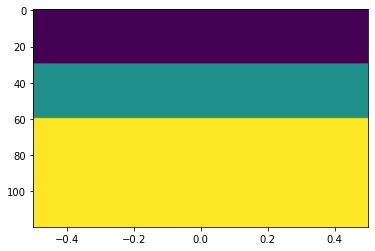

In [9]:
plt.imshow(clf.predict(X)[:,np.newaxis],aspect='auto')

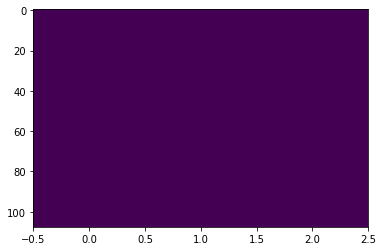

In [23]:
plt.imshow((X@clf.coef_.T+clf.intercept_)==clf.decision_function(X),aspect='auto')

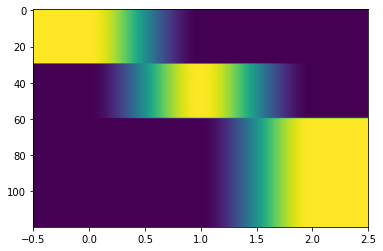

In [12]:
from scipy.special import softmax
plt.imshow(softmax(clf.decision_function(X),axis=1),aspect='auto')

In [7]:
from sklearn.naive_bayes import GaussianNB

In [14]:
# fit model
clf = GaussianNB()
clf.fit(X,Y)

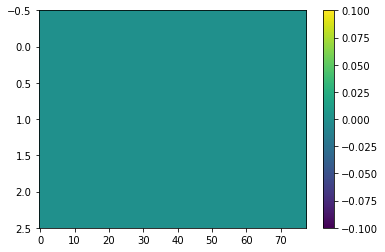

In [24]:
plt.imshow(clf.var_==0,aspect='auto')
plt.colorbar()

In [27]:
clf.var_[:,14:16]

array([[1.20306123e+01, 1.04762260e-07],
       [1.03905326e+01, 1.04762260e-07],
       [9.92764071e+00, 1.04762260e-07]])

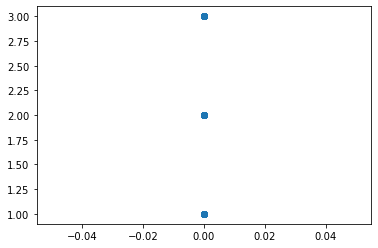

In [25]:
plt.scatter(X[:,15],Y)

In [18]:
clf.theta_

array([[1.78571429e-01, 4.26785714e+01, 3.20714286e+01, 2.14285714e-01,
        1.42857143e-01, 1.78571429e-01, 2.50000000e-01, 6.07142857e-01,
        2.14285714e-01, 2.14285714e-01, 1.72857143e+01, 1.32142857e+00,
        2.71071429e+01, 1.02857143e+01, 7.57142857e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 7.14285714e-02, 3.57142857e-02,
        0.00000000e+00, 2.50000000e-01, 1.42857143e-01, 2.14285714e+00,
        1.57142857e+00, 3.32142857e+00, 7.14285714e-02, 0.00000000e+00,
        8.57142857e-01, 0.00000000e+00, 2.21071429e+01, 1.07142857e-01,
        7.14285714e-02, 0.00000000e+00, 7.50000000e+00, 6.07142857e-01,
        7.14285714e-02, 1.42857143e-01, 7.14285714e-02, 3.57142857e-01,
        1.07142857e-01, 4.64285714e-01, 6.42857143e-01, 2.24285714e+01,
        1.42857143e-01, 2.75000000e+00, 1.82142857e+00, 1.92857143e+00,
        1.39285714e+01, 2.39285714e+01, 2.85714286e-01, 3.85714286e+00,
        0.00000000e+00, 0.00000000e+00, 1.89285714e+01, 1.071428